In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
csvpath = "C:\Alap\Semester_Eins\dsss\Assignment 4\census_income_dataset.csv"
df = pd.read_csv(csvpath)
df_copy = df.copy()

In [5]:
df.AGE.describe()

count    16281.000000
mean        38.767459
std         13.849187
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: AGE, dtype: float64

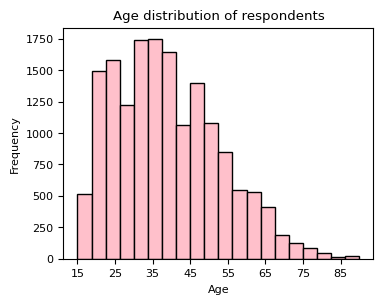

In [6]:
plt.rcParams['font.size'] = 8 # for now: 12, later: 8
plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(4,3))
range = (15, 90)
plt.hist(df['AGE'], bins=20, range=range, color='pink', edgecolor='black')
plt.xticks(np.arange(range[0], range[1] + 1, 10))
# plt.axvline(x=np.mean(df["AGE"]), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of respondents')
plt.savefig("Age_dist.svg", bbox_inches="tight")
plt.show()

In [7]:
df[df["RELATIONSHIP"].isnull()]
len(df)
df["RELATIONSHIP"].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [8]:
no_of_peeps = df["RELATIONSHIP"].value_counts()
no_of_peeps

RELATIONSHIP
 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: count, dtype: int64

In [9]:
counts = no_of_peeps.sort_values()
counts

RELATIONSHIP
 Other-relative     525
 Wife               763
 Unmarried         1679
 Own-child         2513
 Not-in-family     4278
 Husband           6523
Name: count, dtype: int64

In [10]:
categories = counts.index
categories

Index([' Other-relative', ' Wife', ' Unmarried', ' Own-child',
       ' Not-in-family', ' Husband'],
      dtype='object', name='RELATIONSHIP')

In [11]:
count = counts.values
count
total_sum = np.sum(count)
perc = (count/total_sum)*100
perc

array([ 3.22461765,  4.68644432, 10.31263436, 15.43516983, 26.27602727,
       40.06510657])

<Figure size 400x300 with 0 Axes>

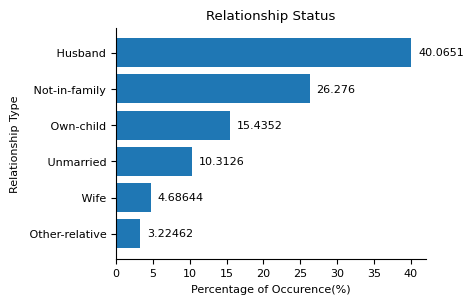

In [12]:
plt.rcParams['font.size'] = 8 # for now: 12, later: 8
plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(4,3))
bar = plt.barh(categories, perc)
# sns.countplot(x='RELATIONSHIP', data=df)
plt.bar_label(bar, padding=5)
sns.despine()
plt.xlabel('Percentage of Occurence(%)')
plt.ylabel('Relationship Type')
plt.title('Relationship Status')
plt.savefig("barplot_rlnship.svg", bbox_inches="tight")
plt.show()

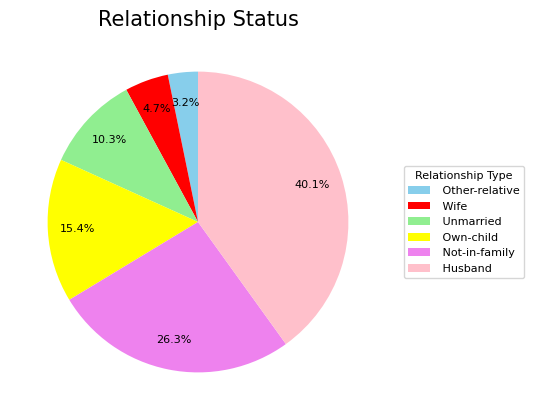

In [24]:
# Assuming categories and perc are defined in your code
plt.rcParams['font.size'] = 8
plt.rcParams['svg.fonttype'] = 'none'

# Create a pie chart
fig, ax = plt.subplots(figsize=(4, 4))
category_colors = ['skyblue', 'red', 'lightgreen', 'yellow', 'violet', 'pink', 'yellow', 'lightgrey', 'lightcyan', 'lightgreen']
# Adjust labeldistance and pctdistance for better spacing
pie = ax.pie(perc, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.8, colors=category_colors)

# Adjust layout for better spacing
plt.tight_layout()

# Add legend outside the pie chart for better visibility
ax.legend(pie[0], categories, title="Relationship Type", bbox_to_anchor=(1, 0.5), loc="center left", bbox_transform=plt.gcf().transFigure)

ax.set_title('Relationship Status', fontsize = 15)

plt.savefig("piechart_rlnship_spaced.svg", bbox_inches="tight")
plt.show()

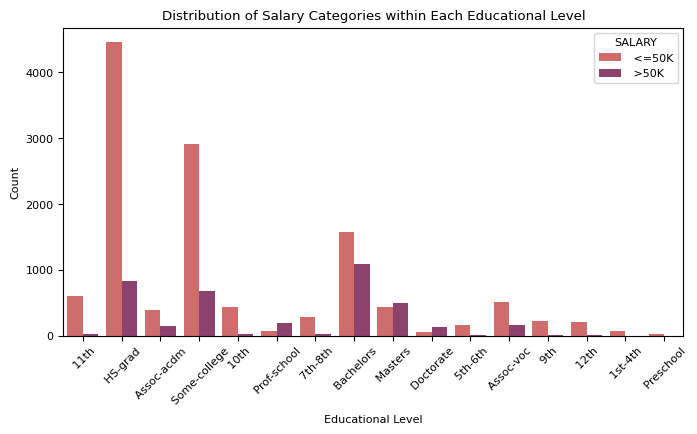

In [25]:
# # Assuming df_copy is your DataFrame
# df_copy['SALARY'].fillna('<=50K', inplace=True)
# df_copy['SALARY'] = df_copy['SALARY'].map({'<=50K': 0, '>50K': 1})  # Map to numeric values

# # Fill missing values in 'EDUCATION' column with a placeholder value
# df_copy['EDUCATION'].fillna('Unknown', inplace=True)

# # Create a stacked bar chart using Seaborn's barplot
plt.rcParams['font.size'] = 8
plt.rcParams['svg.fonttype'] = 'none'
# Create a pie chart
plt.figure(figsize=(8,4))

# sns.barplot(x='EDUCATION', y='SALARY', data=df_copy, estimator=lambda x: len(x) / len(df_copy) * 100, color='skyblue', edgecolor='k')
sns.countplot(x='EDUCATION', hue='SALARY', data=df_copy, palette='flare')
plt.title('Distribution of Salary Categories within Each Educational Level')
plt.xticks(rotation = 45)
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.savefig("edu_vs_sal.svg", bbox_inches="tight")
plt.show()